import general dependencies

In [2]:
import requests
import re
import urllib.request
from bs4 import BeautifulSoup
from collections import deque
from html.parser import HTMLParser
from urllib.parse import urlparse
import os
import pandas as pd
import numpy as np

import internal dependencies

In [3]:
import os
import sys

script_dir = os.path.abspath(os.getcwd())
mymodule_dir = os.path.join( script_dir, '..' )
sys.path.append( mymodule_dir )

from scraping import moodle_scraper as ms

ms.say_hello()

Hello, world!


In [4]:
os.chdir('..')
os.path.abspath(os.getcwd())

'/Users/julian/Library/CloudStorage/OneDrive-HertieSchool/04_projects/semsearch'

In [5]:
def remove_newlines(serie):
    serie = serie.str.replace('\n', ' ')
    serie = serie.str.replace('\\n', ' ')
    serie = serie.str.replace('  ', ' ')
    serie = serie.str.replace('  ', ' ')
    return serie


# Create a list to store the text files
texts=[]


# Get all the text files in the text directory
os.chdir('./data')
os.path.abspath(os.getcwd())

for file in os.listdir("./text/"):
    if file[0] == '.':
        continue
    print(file)

    # Open the file and read the text
    with open("text/"+file, "r") as f:
        text = f.read()
        
        #print(text)

        # Omit the first 11 lines and the last 4 lines, then replace -, _, and #update with spaces.
        texts.append((file.replace('-',' ').replace('_', ' ').replace('#update',''), text))

# Create a dataframe from the list of texts
df = pd.DataFrame(texts, columns = ['fname', 'text'])

# Set the text column to be the raw text with the newlines removed
df['text'] = remove_newlines(df.text)
#df.to_csv('processed/scraped.csv')
df.head()

testColumbia University, School of International & Public Affairs – SIPA (New York, NY, USA) Curricular information.txt
testColumbia University, School of International & Public Affairs – SIPA (New York, NY, USA) Application requirements.txt
testColumbia University, School of International & Public Affairs – SIPA (New York, NY, USA) Basic facts.txt


/var/folders/4y/lh_81q053xx32mtggqg7y6nw0000gn/T/ipykernel_33510/4154143500.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  serie = serie.str.replace('\\n', ' ')


,fname,text
0,"testColumbia University, School of Internation...","Columbia University, School of International ..."
1,"testColumbia University, School of Internation...","Columbia University, School of International ..."
2,"testColumbia University, School of Internation...","Columbia University, School of International ..."


<AxesSubplot: >

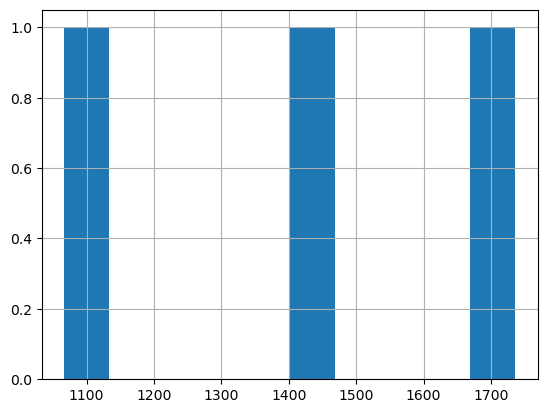

In [6]:
import tiktoken

# Load the cl100k_base tokenizer which is designed to work with the ada-002 model
tokenizer = tiktoken.get_encoding("cl100k_base")

df = pd.read_csv('processed/scraped.csv', index_col=0)
df.columns = ['title', 'text']

# Tokenize the text and save the number of tokens to a new column
df['n_tokens'] = df.text.apply(lambda x: len(tokenizer.encode(x)))

# Visualize the distribution of the number of tokens per row using a histogram
df.n_tokens.hist()